# Task 1

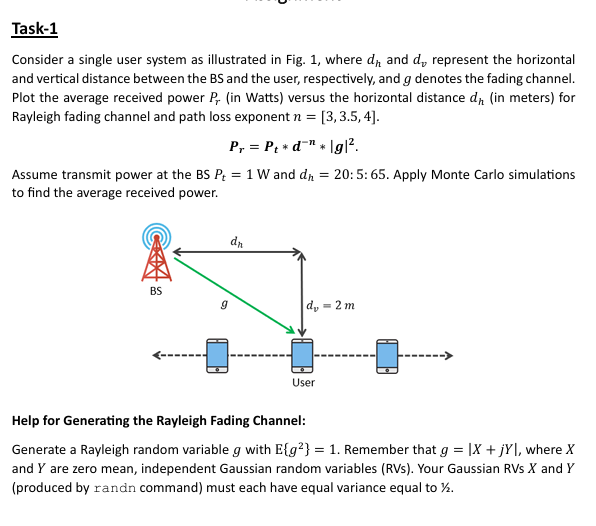

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def get_rayleigh_fading(size):
  X = np.random.normal(0, np.sqrt(0.5), size)
  Y = np.random.normal(0, np.sqrt(0.5), size)

  return np.sqrt(X**2 + Y**2)

In [4]:
iterations = 10**5 # number of simulations to run
n_array = np.array([3, 3.5, 4]) # path loss exponents
dh_array = np.arange(20,65, 5) # an array holding all horizontal distances of each device (confusion)
dv = 2 # vertical distance
pt = 1 # transmit power from BS

calculating for n = 4.0: 100%|██████████| 9/9 [00:00<00:00, 151.56it/s]


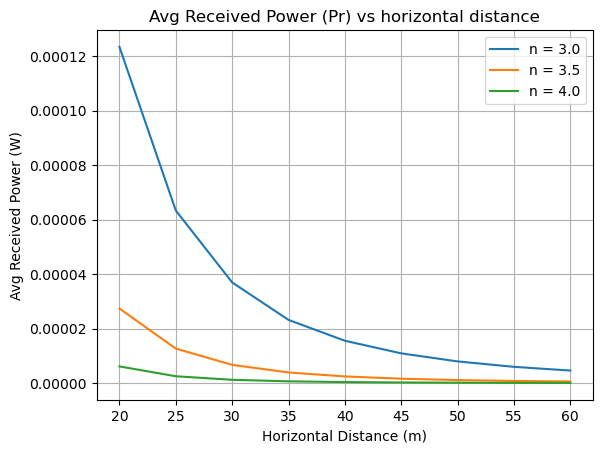

In [5]:
for n in n_array:
  avg_pr = []
  for dh in tqdm(dh_array, desc=f"calculating for n = {n}"):
    g = get_rayleigh_fading(iterations)
    d = np.sqrt(dh**2 + dv**2)
    pr = pt * d ** (-n) * g**2

    avg_pr.append(np.mean(pr))

  # plot this
  plt.plot(dh_array, avg_pr, label=f"n = {n}")


plt.title("Avg Received Power (Pr) vs horizontal distance")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Avg Received Power (W)")
plt.legend()
plt.grid()
plt.show()

# Task 2

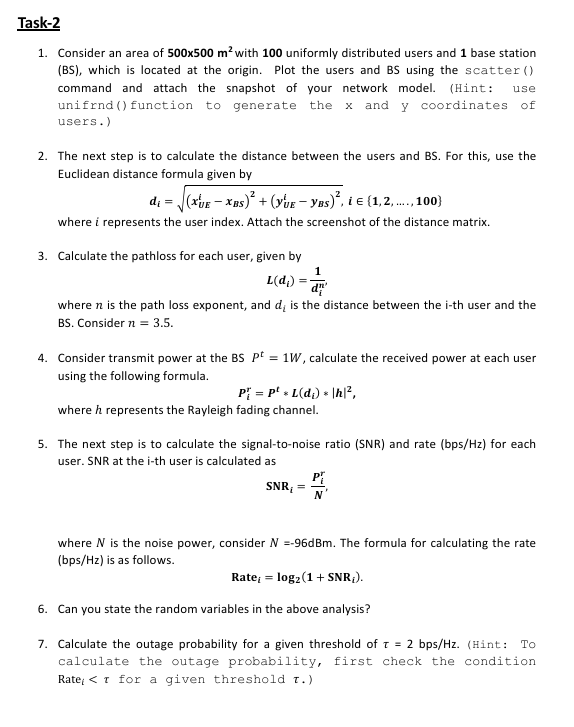

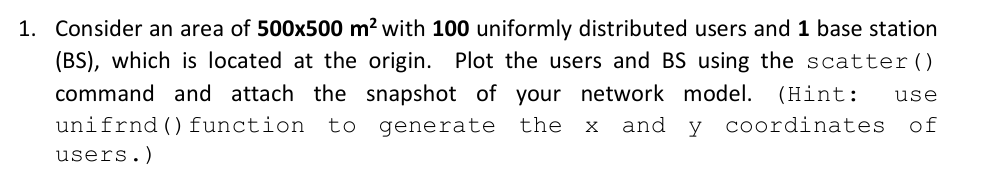

In [6]:
num_users = 100
area = 500

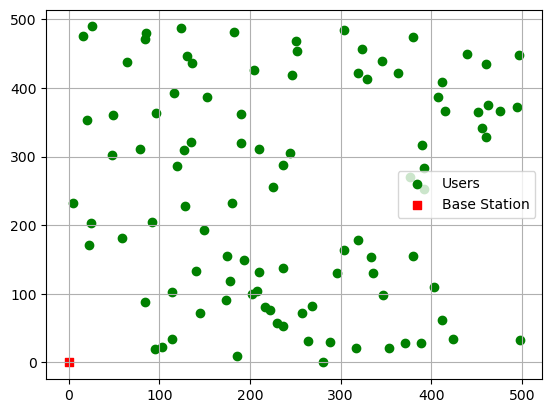

In [7]:
users_x = np.random.uniform(0, area, num_users)
users_y = np.random.uniform(0, area, num_users)

bs_x = 0
bs_y = 0

plt.scatter(users_x, users_y, label="Users", color="green")
plt.scatter(bs_x, bs_y, label="Base Station", color="red", marker='s')
plt.legend()
plt.grid()
plt.show()


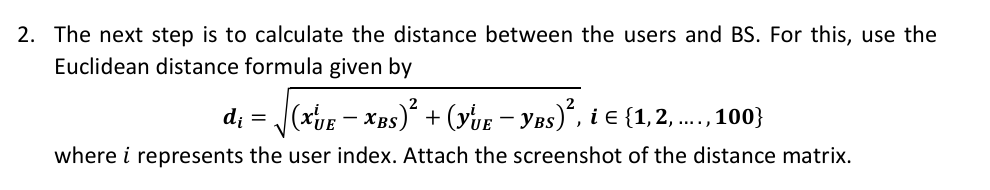

(array([ 4.,  1.,  2.,  5.,  9.,  7.,  5.,  5.,  5., 11.,  5.,  4.,  5.,
         7.,  5.,  4.,  9.,  3.,  3.,  1.]),
 array([ 97.00298337, 125.58240624, 154.16182911, 182.74125198,
        211.32067485, 239.90009771, 268.47952058, 297.05894345,
        325.63836632, 354.21778919, 382.79721206, 411.37663492,
        439.95605779, 468.53548066, 497.11490353, 525.6943264 ,
        554.27374926, 582.85317213, 611.432595  , 640.01201787,
        668.59144074]),
 <BarContainer object of 20 artists>)

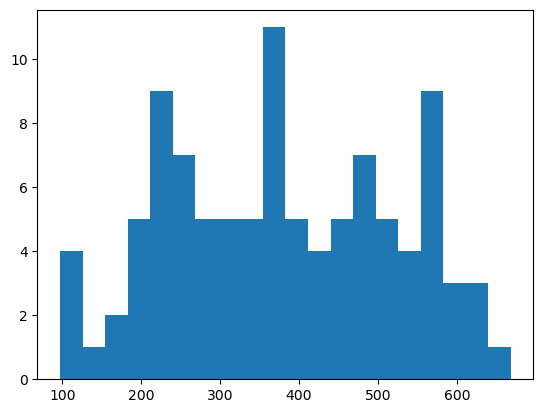

In [8]:
d = np.sqrt((users_x-bs_x)**2 + (users_y-bs_y)**2)
plt.hist(d, bins=20)

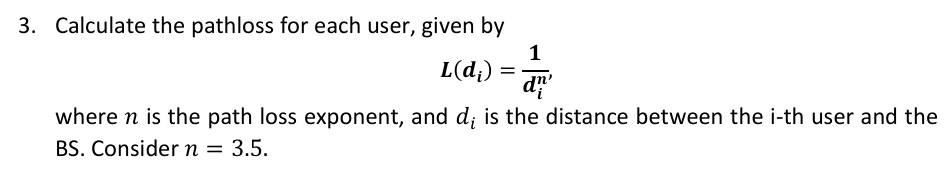

(array([85.,  7.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.29400858e-10, 5.68481811e-09, 1.12402354e-08, 1.67956526e-08,
        2.23510699e-08, 2.79064871e-08, 3.34619044e-08, 3.90173216e-08,
        4.45727389e-08, 5.01281562e-08, 5.56835734e-08, 6.12389907e-08,
        6.67944079e-08, 7.23498252e-08, 7.79052424e-08, 8.34606597e-08,
        8.90160769e-08, 9.45714942e-08, 1.00126911e-07, 1.05682329e-07,
        1.11237746e-07]),
 <BarContainer object of 20 artists>)

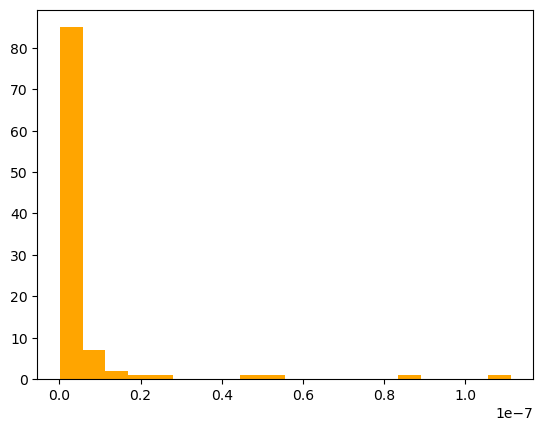

In [9]:
n = 3.5 # path loss exponent
path_loss =  d**(-n)

plt.hist(path_loss, bins=20, color="orange")

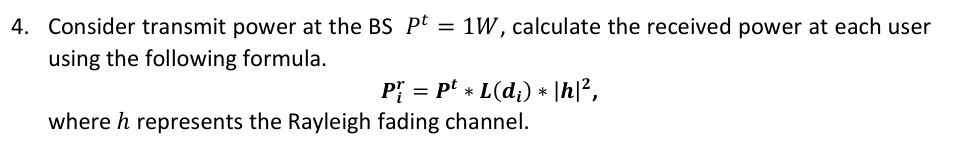

(array([77.,  7.,  8.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.81792883e-12, 3.77603339e-09, 7.54824886e-09, 1.13204643e-08,
        1.50926798e-08, 1.88648953e-08, 2.26371107e-08, 2.64093262e-08,
        3.01815417e-08, 3.39537571e-08, 3.77259726e-08, 4.14981881e-08,
        4.52704035e-08, 4.90426190e-08, 5.28148344e-08, 5.65870499e-08,
        6.03592654e-08, 6.41314808e-08, 6.79036963e-08, 7.16759118e-08,
        7.54481272e-08]),
 <BarContainer object of 20 artists>)

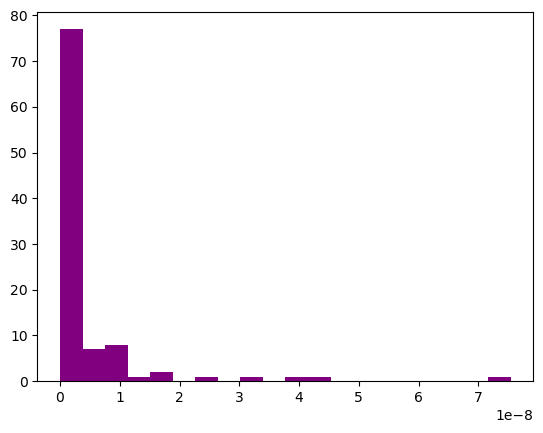

In [10]:
# recieved power

pt = 1 # transmit power from BS

h = get_rayleigh_fading(num_users)

pr = pt * path_loss * h**2

plt.hist(pr, bins=20, color="purple")

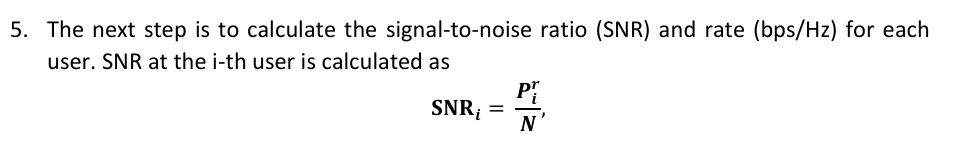

(array([77.,  7.,  8.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.51994484e+01, 1.50326597e+04, 3.00501200e+04, 4.50675802e+04,
        6.00850405e+04, 7.51025007e+04, 9.01199610e+04, 1.05137421e+05,
        1.20154882e+05, 1.35172342e+05, 1.50189802e+05, 1.65207262e+05,
        1.80224723e+05, 1.95242183e+05, 2.10259643e+05, 2.25277103e+05,
        2.40294564e+05, 2.55312024e+05, 2.70329484e+05, 2.85346944e+05,
        3.00364405e+05]),
 <BarContainer object of 20 artists>)

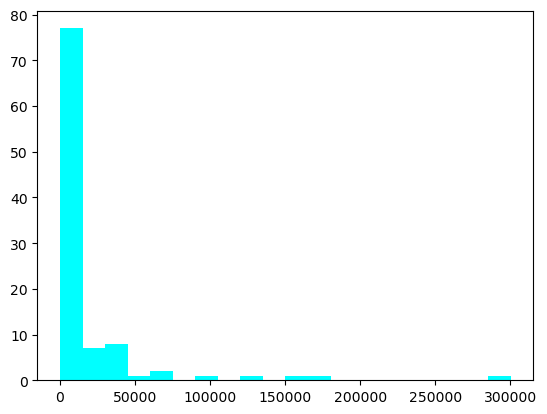

In [11]:
# SNR
N_dbm = -96 # in dbm
N = 10**(N_dbm/10) / 1000 # in W

SNR = pr / N

plt.hist(SNR, bins=20, color="cyan")

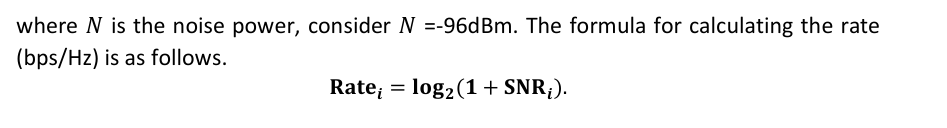

(array([ 1.,  0.,  1.,  3.,  3.,  2.,  4.,  9.,  4., 19., 13.,  8.,  5.,
         6.,  5.,  8.,  3.,  2.,  3.,  1.]),
 array([ 4.01787279,  4.72679711,  5.43572142,  6.14464574,  6.85357006,
         7.56249437,  8.27141869,  8.98034301,  9.68926733, 10.39819164,
        11.10711596, 11.81604028, 12.52496459, 13.23388891, 13.94281323,
        14.65173755, 15.36066186, 16.06958618, 16.7785105 , 17.48743481,
        18.19635913]),
 <BarContainer object of 20 artists>)

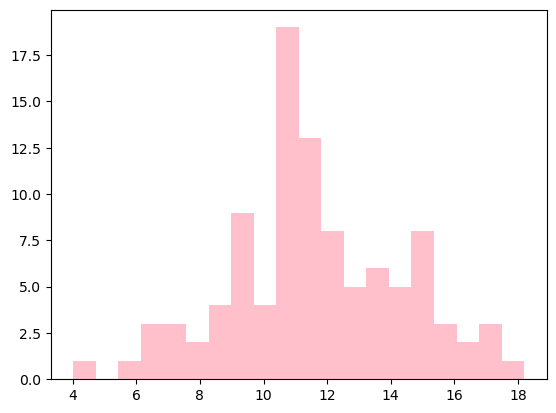

In [12]:
rate = np.log2(1 + SNR) #

plt.hist(rate, bins=20, color="pink")

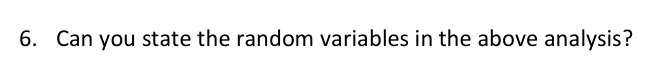

random variables are rayleigh fading h and coords of users

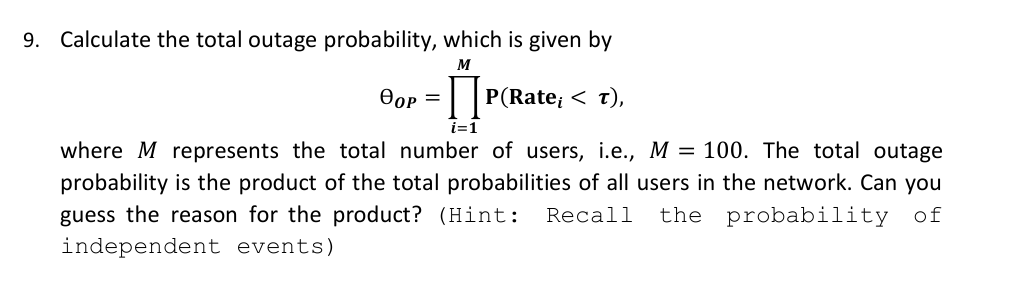

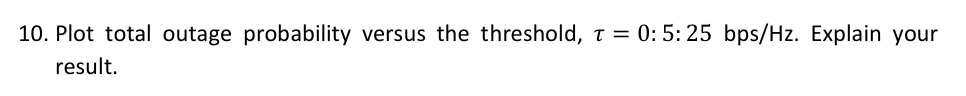

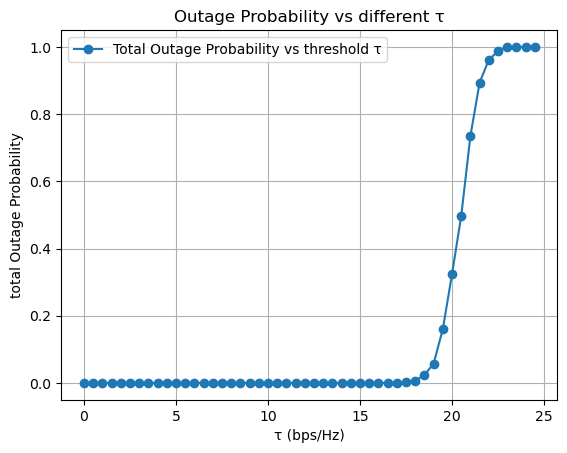

In [14]:
iterations = 1000

num_users = 100
area = 500
pt = 1
N_dbm = -96 # in dbm
N = 10**(N_dbm/10) / 1000 # in W

tau_range = np.arange(0,25,0.5)# 2 bps/Hz




users_x = np.random.uniform(0, area, num_users)
users_y = np.random.uniform(0, area, num_users)
bs_x = 0
bs_y = 0
d = np.sqrt((users_x-bs_x)**2 + (users_y-bs_y)**2)
path_loss =  d**(-n)

total_outage_probabilities = []
for tau in tau_range:

    rates = []

    for i in range(iterations):


        h = get_rayleigh_fading(num_users)

        pr = pt * path_loss * h**2

        snr = pr / N

        rate = np.log2(1 + snr)

        rates.append(rate)


    rates = np.array(rates)
    outage_prob = np.mean(rates < tau ,  axis=0)

    total_outage_prob = np.product(outage_prob)
    total_outage_probabilities.append(total_outage_prob)



# plot graph between outage probability and distance
plt.plot(tau_range, total_outage_probabilities, label="Total Outage Probability vs threshold τ", marker='o')
plt.title("Outage Probability vs different τ")
plt.xlabel("τ (bps/Hz)")
plt.ylabel("total Outage Probability")
plt.legend()
plt.grid()



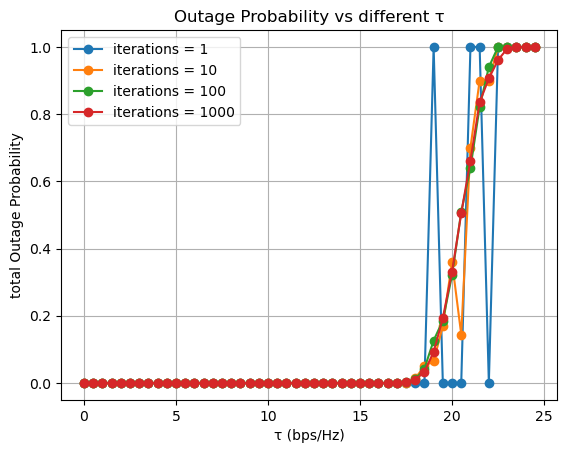

In [15]:
iterations_range = [1,10,100,1000] # number of simulations to run

num_users = 100
area = 500
pt = 1
N_dbm = -96 # in dbm
N = 10**(N_dbm/10) / 1000 # in W

tau_range = np.arange(0,25,0.5)# 2 bps/Hz




users_x = np.random.uniform(0, area, num_users)
users_y = np.random.uniform(0, area, num_users)
bs_x = 0
bs_y = 0
d = np.sqrt((users_x-bs_x)**2 + (users_y-bs_y)**2)
path_loss =  d**(-n)


for iterations in iterations_range:
    total_outage_probabilities = []
    for tau in tau_range:

        rates = []

        for i in range(iterations):


            h = get_rayleigh_fading(num_users)

            pr = pt * path_loss * h**2

            snr = pr / N

            rate = np.log2(1 + snr)

            rates.append(rate)


        rates = np.array(rates)
        outage_prob = np.mean(rates < tau ,  axis=0)

        total_outage_prob = np.product(outage_prob)
        total_outage_probabilities.append(total_outage_prob)



    # plot graph between outage probability and distance
    plt.plot(tau_range, total_outage_probabilities, label=f"iterations = {iterations}", marker='o' )

plt.title("Outage Probability vs different τ")
plt.xlabel("τ (bps/Hz)")
plt.ylabel("total Outage Probability")
plt.legend()
plt.grid()

